In [1]:
# import weather
# import mongodb
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, '..')

import musical_weather

In [2]:
# first_time = True
# if first_time:
#     historical_weather, condensed, todays_forecast = weather.weather_main()
#     print("Storing historical weather data...")
#     weather.store_weather_data(historical_weather, "historical_raw")
#     print("Storing historical summary data...")
#     weather.store_weather_data(condensed, "historical_summary")
#     print("Storing forecast weather data...")
#     weather.store_weather_data(todays_forecast, "forecast")
#     print("Weather data stored.")

In [2]:
historical_weather, historical_summary = musical_weather.get_stored_weather()
todays_forecast = musical_weather.get_forecast(historical_weather)

Coordinates 52.52000045776367°N 13.419998168945312°E
Elevation 38.0 m asl
Timezone b'America/Los_Angeles' b'PDT'
Timezone difference to GMT+0 -25200 s


In [3]:
todays_t_score = todays_forecast['average_t_score'][0]
weather_std, weather_music, selected_songs_weather = musical_weather.get_music_selection(todays_forecast, historical_weather, todays_t_score, 'weather')
season_std, season_music, selected_songs_season = musical_weather.get_music_selection(todays_forecast, historical_weather, todays_t_score, 'season')

In [5]:
season_music.columns

Index(['loudness', 'mode', 'speechiness', 'instrumentalness', 'liveness',
       'time_signature', 'song', 'track_id', 'artist', 'event', 'type',
       'popularity', 'loudness_st_scale', 'loudness_power_transform',
       'mode_power_transform', 'mode_quantile_transform',
       'speechiness_st_scale', 'speechiness_power_transform',
       'instrumentalness_st_scale', 'instrumentalness_power_transform',
       'liveness_st_scale', 'liveness_power_transform',
       'time_signature_st_scale', 'time_signature_quantile_transform',
       'popularity_st_scale', 'popularity_power_transform', 'danceability',
       'energy', 'key', 'loudness_quantile_transform', 'mode_st_scale',
       'speechiness_quantile_transform', 'acousticness',
       'instrumentalness_quantile_transform', 'liveness_quantile_transform',
       'valence', 'tempo', 'duration_ms', 'time_signature_power_transform',
       'popularity_quantile_transform', 'is_precipitation', 'event_le',
       'score', 'average_t_score'],

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


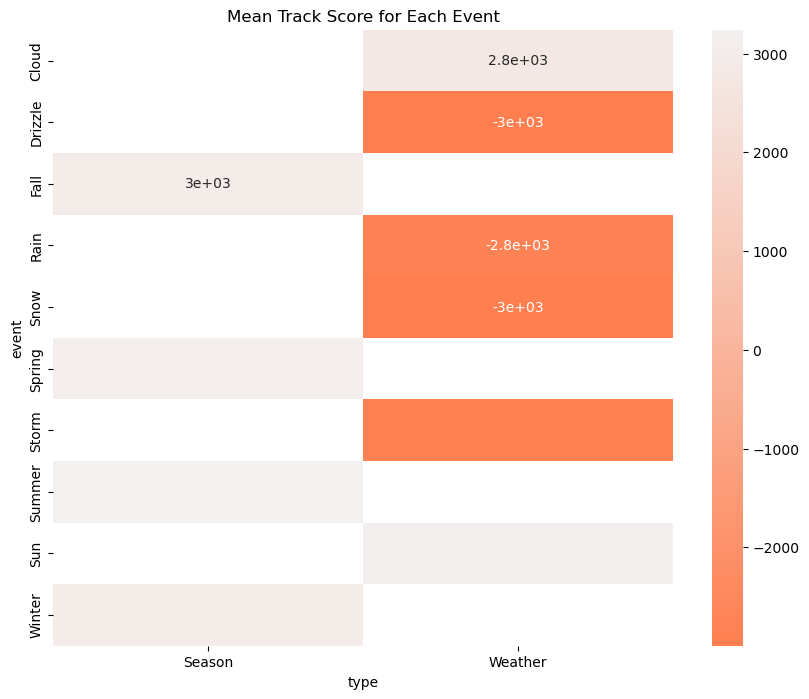

In [28]:
import seaborn as sns

# Assuming weather_music and season_music are your dataframes

# Step 1: Calculate mean score for each event
weather_music_means = weather_music.groupby(['type','event'])['score'].mean().reset_index()
season_music_means = season_music.groupby(['type','event'])['score'].mean().reset_index()

# Step 2: Pivot the data
pivot_df = pd.concat([weather_music_means, season_music_means]).pivot(index='event', columns='type', values='score')

# Step 3: Create heatmap
plt.figure(figsize=(10, 8))

# Create a custom color palette
cmap = sns.color_palette("light:#FF7F50_r", as_cmap=True)  # Orange to pink color palette

sns.heatmap(pivot_df, annot=True, cmap=cmap)
plt.title('Mean Track Score for Each Event')
plt.show()

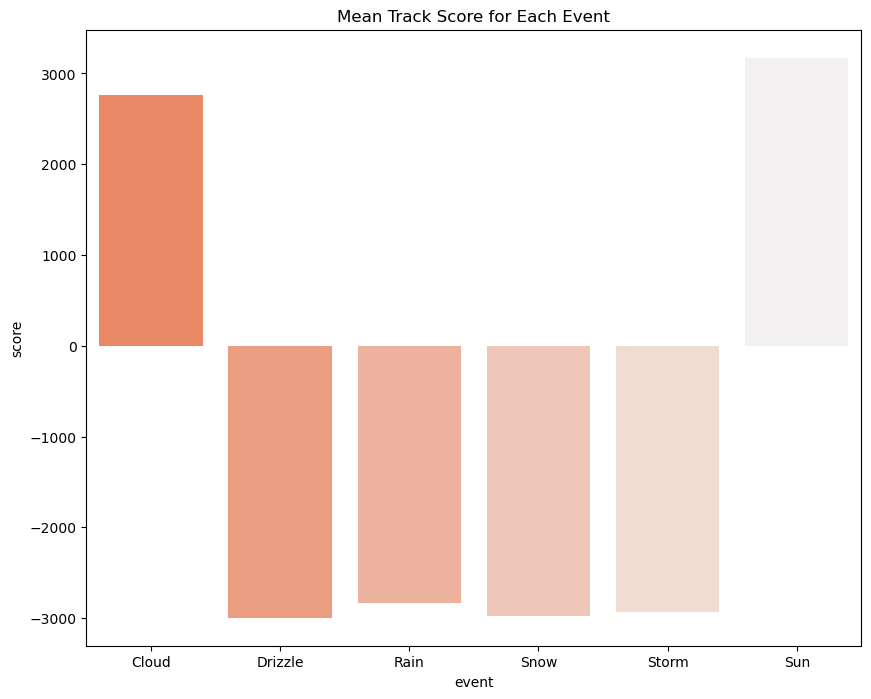

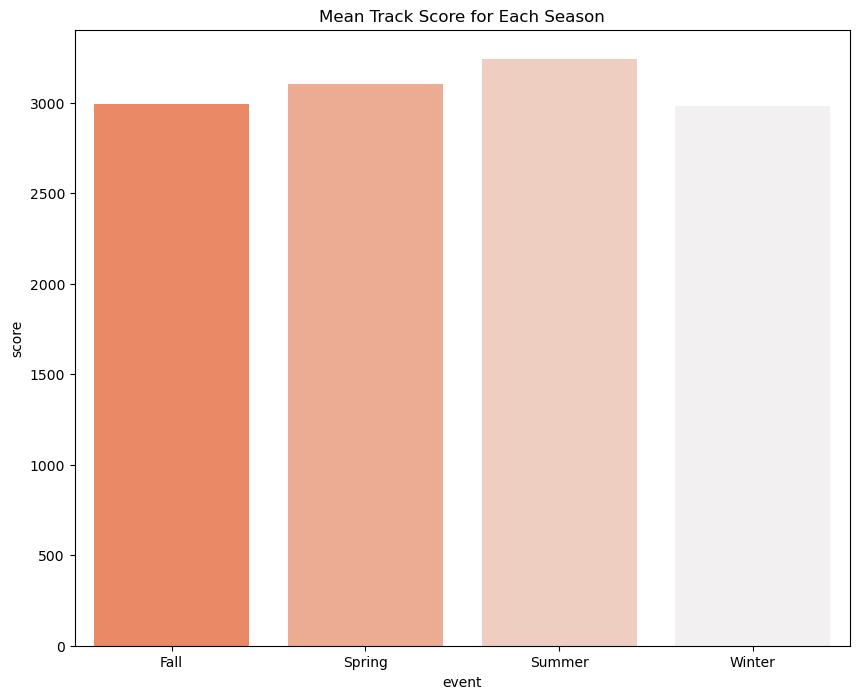

In [30]:
# Step 1: Calculate mean score for each event
weather_music_means = weather_music.groupby('event')['score'].mean().reset_index()
season_music_means = season_music.groupby('event')['score'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='event', y='score', data=weather_music_means, palette="light:#FF7F50_r")
plt.title('Mean Track Score for Each Event')
plt.show()



# Create bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='event', y='score', data=season_music_means, palette="light:#FF7F50_r")
plt.title('Mean Track Score for Each Season')
plt.show()

In [18]:
historical_weather.columns

Index(['date', 'weather_code', 'temperature_2m_max', 'temperature_2m_min',
       'temperature_2m_mean', 'apparent_temperature_max',
       'apparent_temperature_min', 'apparent_temperature_mean', 'sunrise',
       'sunset', 'daylight_duration', 'sunshine_duration', 'precipitation_sum',
       'rain_sum', 'snowfall_sum', 'precipitation_hours', 'wind_speed_10m_max',
       'wind_gusts_10m_max', 'wind_direction_10m_dominant',
       'shortwave_radiation_sum', 'season', 'description', 'weather_score',
       'event', 'weight', 'weather_score_weighted', 'average_t_score'],
      dtype='object')

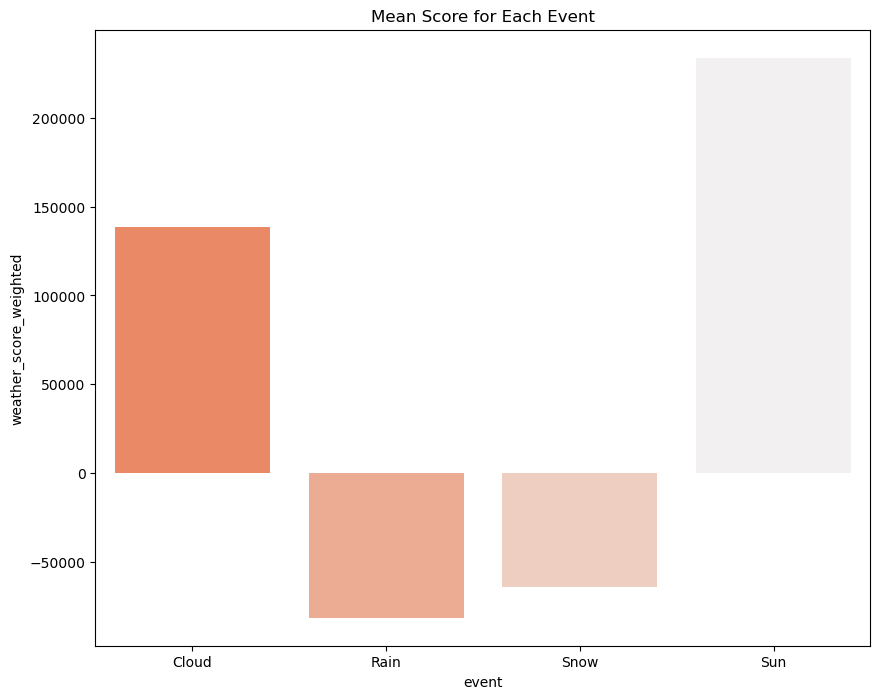

In [26]:
# Step 1: Calculate mean score for each event
weather_means = historical_weather.groupby('event')['weather_score_weighted'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='event', y='weather_score_weighted', data=weather_means, palette="light:#FF7F50_r")
plt.title('Mean Score for Each Event')
plt.show()

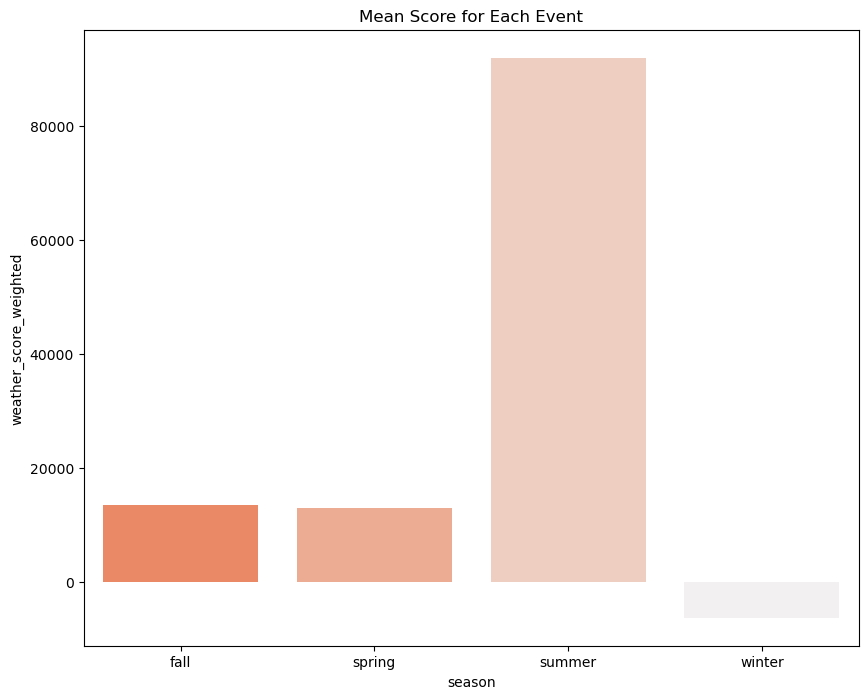

In [27]:
# Step 1: Calculate mean score for each event
weather_means = historical_weather.groupby('season')['weather_score_weighted'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='season', y='weather_score_weighted', data=weather_means, palette="light:#FF7F50_r")
plt.title('Mean Score for Each Event')
plt.show()

In [4]:
todays_forecast['date'] = todays_forecast['date'].dt.date
todays_forecast['date']

0    2024-06-08
Name: date, dtype: object

In [42]:
historical_weather['date']

0      2014-06-07
1      2014-06-11
2      2014-06-12
3      2014-06-18
4      2014-06-20
          ...    
3649   2024-06-03
3650   2024-06-04
3651   2024-05-31
3652   2024-06-01
3653   2024-06-02
Name: date, Length: 3654, dtype: datetime64[ns]

In [6]:
model_base, model_fit = musical_weather.create_weather_model(historical_weather)

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-

In [7]:
forecast_model = model_fit

# Ensure that 'date' is of datetime type
if 'date' in todays_forecast.columns:
    # Set 'date' as the index of the DataFrame
    todays_forecast.set_index('date', inplace=True)

In [8]:
todays_forecast

,wind_speed_10m_max,sunset,wind_direction_10m_dominant,event,weather_score,apparent_temperature_min,season,apparent_temperature_max,precipitation_hours,wind_gusts_10m_max,...,sunshine_duration,shortwave_radiation_sum,daylight_duration,temperature_2m_max,temperature_2m_min,description,weather_score_weighted,snowfall_sum,weight,precipitation_sum
date,,,,,,,,,,,,,,,,,,,,,
2024-06-08,11.677483,0,256.986755,Cloud,0,47.218163,summer,75.147408,0.0,27.291399,...,52257.070312,24.33,60134.375,78.161903,50.801899,Cloudy,104616.632812,0.0,104616.632812,0.0


In [9]:
# Make predictions
start_date = todays_forecast.index.max()
end_date = todays_forecast.index.max()

In [10]:
start_date

datetime.date(2024, 6, 8)

In [11]:
end_date

datetime.date(2024, 6, 8)

In [16]:
todays_forecast = musical_weather.predict_weather_event(todays_forecast, model_fit)

# musical_weather.main() full testing and run validation

In [2]:
selected_songs_weather, selected_songs_season = musical_weather.main()
selected_songs_season

Coordinates 52.52000045776367°N 13.419998168945312°E
Elevation 38.0 m asl
Timezone b'America/Los_Angeles' b'PDT'
Timezone difference to GMT+0 -25200 s


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,loudness,speechiness,instrumentalness,liveness,time_signature,song,track_id,artist,event,type,...,valence,tempo,duration_ms,time_signature_power_transform,popularity_quantile_transform,is_precipitation,event_le,score,t_score,average_t_score
765,-4.675,0.0685,0.000000,0.0712,4,Sean Paul,0k2GOhqsrxDTAbFFSdNJjT,Temperature,Summer,Season,...,0.8220,125.040,218573,0.196259,0.883383,0,7,3342.844632,NaN,-0.921670
833,-4.380,0.2670,0.000000,0.2890,4,The Pussycat Dolls,3BxWKCI06eQ5Od8TY2JBeA,Buttons,Summer,Season,...,0.4080,210.857,225560,0.196259,0.533534,0,7,2484.429722,NaN,-0.607132
845,-5.835,0.0439,0.000000,0.1610,4,GROUPLOVE,0GO8y8jQk1PkHzS31d699N,Tongue Tied,Summer,Season,...,0.3710,112.960,218013,0.196259,0.883383,0,7,3403.548771,NaN,-0.921321
874,-6.351,0.0421,0.000017,0.1650,4,Khalid,5Z3GHaZ6ec9bsiI5BenrbY,Young Dumb & Broke,Summer,Season,...,0.3940,136.948,202547,0.196259,0.904905,0,7,2582.206630,NaN,-0.846466
875,-3.553,0.0853,0.003250,0.3310,4,Fitz and The Tantrums,2AYEOC02WLhUiOoaig2SEH,Out of My League,Summer,Season,...,0.5270,169.965,209386,0.196259,0.774775,0,7,2915.205987,NaN,-0.605642
881,-6.425,0.1370,0.000000,0.1150,4,Snoop Dogg,5HQVUIKwCEXpe7JIHyY734,"Young, Wild & Free (feat. Bruno Mars)",Summer,Season,...,0.5310,95.078,207333,0.196259,0.774775,0,7,3520.412193,NaN,-0.623349
899,-7.342,0.0255,0.000040,0.1150,4,Tyler Childers,0fCwTrRNfoNk962ati8n2K,All Your'n,Summer,Season,...,0.8390,78.176,218280,0.196259,0.883383,0,7,4346.961277,NaN,-0.730203
904,-5.900,0.0436,0.000000,0.0784,4,The Smiths,1FvDJ9KGxcqwv1utyPL3JZ,This Charming Man - 2011 Remaster,Summer,Season,...,0.7510,103.912,162920,0.196259,0.821321,0,7,3318.914117,NaN,-0.610184
908,-12.637,0.0455,0.001550,0.1800,4,Mac Miller,1OubIZ0ARYCUq5kceYUQiO,Congratulations (feat. Bilal),Summer,Season,...,0.2070,57.750,256427,0.196259,0.844344,0,7,5054.094372,NaN,-0.856473
916,-5.404,0.0306,0.014300,0.4220,4,Empire Of The Sun,3zEN0ii6s4DHHBpnTp3RP7,We Are The People,Summer,Season,...,0.5340,122.989,267373,0.196259,0.844344,0,7,3684.768647,NaN,-0.600208


In [3]:
selected_songs_weather

,loudness,speechiness,instrumentalness,liveness,time_signature,song,track_id,artist,event,type,...,valence,tempo,duration_ms,time_signature_power_transform,popularity_quantile_transform,is_precipitation,event_le,score,t_score,average_t_score
1493,-32.257,0.0373,0.897000,0.0977,4,Hania Rani,5b1GHRn5A3gIzcq8QbcSEH,Spring,Cloud,Weather,...,0.162,115.123,186600,0.196259,0.000000,0,0,1978.465064,NaN,-0.747601
1570,-20.063,0.0341,0.958000,0.3530,4,Blake Ewing,5tfDvmkWMXgTVN49Kbw1ms,Fractals,Cloud,Weather,...,0.049,100.011,204760,0.196259,0.137137,0,0,2550.374789,NaN,-0.700330
1602,-12.605,0.0356,0.863000,0.1210,4,Tree Climber,1X6TR8n5DUcPtc9AsFPUco,Born from Dreams,Cloud,Weather,...,0.281,141.974,167746,0.196259,0.141642,0,0,2303.226195,NaN,-0.555536
1610,-15.175,0.0362,0.928000,0.0986,4,Old Blanket,19gbLmOvJWTL7gsL2C4pwS,Shooting Stars,Cloud,Weather,...,0.248,133.853,145851,0.196259,0.155656,0,0,1890.795645,NaN,-0.530155
1645,-10.616,0.0612,0.953000,0.0973,3,Pr4ntik,4HnYUnC3EmmVcSm8qMEghO,Evening Hours,Cloud,Weather,...,0.291,200.071,170562,-2.101430,0.137137,0,0,1667.037360,NaN,-0.522303
1706,-7.311,0.0297,0.124000,0.1450,4,Beach House,7H0ya83CMmgFcOhw0UB6ow,Space Song,Cloud,Weather,...,0.601,147.067,320467,0.196259,0.821321,0,0,3739.454445,NaN,-0.504085
1811,-3.944,0.2060,0.057200,0.3490,3,Deftones,5Bpc360LNUScK53FrM8nvB,Hole in the Earth,Cloud,Weather,...,0.304,205.784,249320,-2.101430,0.516016,0,0,2595.067027,NaN,-0.525813
2030,-8.607,0.2740,0.705000,0.2080,1,Joji,0baNzeUcPQnQSagpe8T0mD,worldstar money (interlude),Cloud,Weather,...,0.459,146.565,126312,-3.305835,0.750250,0,0,1921.415577,NaN,-0.524075
2039,-7.063,0.0281,0.490000,0.1840,4,Mac DeMarco,2OFrAsP5Vrcb0DtsPNsm54,My Kind of Woman,Cloud,Weather,...,0.460,91.769,190846,0.196259,0.089590,0,0,3449.928735,NaN,-0.631906
2093,-5.028,0.0874,0.063000,0.0685,4,Joy Again,3jfZ9M23l0L7RxzYMTgBTv,Looking Out for You,Cloud,Weather,...,0.937,100.721,179499,0.196259,0.863864,0,0,3793.030765,NaN,-0.524425


## Get historical weather and forecast data

In [3]:
# todays_forecast = weather.get_forecast()
# pd.DataFrame(todays_forecast)

In [7]:
historical_weather, historical_summary = musical_weather.get_stored_weather()
todays_forecast = musical_weather.get_forecast(historical_weather)

Coordinates 52.52000045776367°N 13.419998168945312°E
Elevation 38.0 m asl
Timezone b'America/Los_Angeles' b'PDT'
Timezone difference to GMT+0 -25200 s


In [4]:
historical_weather

,date,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,season,description,weather_score,event,weight,weather_score_weighted,average_t_score
0,2014-06-01,2,64.650200,49.170200,57.138947,61.689705,45.978081,53.891354,0,0,...,18.567101,317.268646,24.600000,summer,Partly Cloudy,1,Cloud,106733.328125,213466.656250,-0.329841
1,2014-06-02,51,64.830200,48.180199,57.652695,62.277229,45.301971,54.428406,0,0,...,18.119701,17.676233,18.940001,summer,Light Drizzle,1,Rain,-60607.578125,-121215.156250,-0.662617
2,2014-06-03,53,66.270203,49.800201,59.058949,63.626461,47.680580,57.165218,0,0,...,14.987900,4.000119,16.260000,summer,Drizzle,1,Rain,-71824.382812,-143648.765625,-0.632962
3,2014-06-04,2,69.150200,55.200199,62.538940,67.358307,54.227848,60.809299,0,0,...,14.764199,117.019676,20.100000,summer,Partly Cloudy,1,Cloud,90910.937500,181821.875000,-0.360275
4,2014-06-05,61,67.260201,52.320198,59.928955,63.255253,49.723610,56.905182,0,0,...,26.844000,222.463196,16.719999,summer,Light Rain,1,Rain,-63945.484375,-127890.968750,-0.168605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,2024-05-28,63,64.235306,51.365299,59.791553,62.095142,49.376316,58.382809,0,0,...,20.804100,246.992340,12.520000,spring,Rain,1,Rain,-59753.390625,-119506.781250,0.753392
3650,2024-05-29,55,71.345299,50.825298,61.861553,67.597382,48.328720,59.089214,0,0,...,25.725500,182.872345,22.580000,spring,Heavy Drizzle,-1,Rain,-101104.320312,-202208.640625,0.214275
3651,2024-05-30,63,69.905304,55.685303,62.420300,71.192375,55.172230,62.675884,0,0,...,16.553801,114.000443,17.110001,spring,Rain,1,Rain,-69521.578125,-139043.156250,0.746509
3652,2024-05-31,51,72.245300,56.135300,63.732803,71.455246,55.917599,63.394810,0,0,...,14.987900,199.155701,23.200001,winter,Light Drizzle,1,Rain,-106945.421875,-213890.843750,0.958201


In [5]:
historical_weather.head()

,date,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,season,description,weather_score,event,weight,weather_score_weighted,average_t_score
0,2014-06-01,2,64.650200,49.170200,57.138947,61.689705,45.978081,53.891354,0,0,...,18.567101,317.268646,24.600000,summer,Partly Cloudy,1,Cloud,106733.328125,213466.656250,-0.329841
1,2014-06-02,51,64.830200,48.180199,57.652695,62.277229,45.301971,54.428406,0,0,...,18.119701,17.676233,18.940001,summer,Light Drizzle,1,Rain,-60607.578125,-121215.156250,-0.662617
2,2014-06-03,53,66.270203,49.800201,59.058949,63.626461,47.680580,57.165218,0,0,...,14.987900,4.000119,16.260000,summer,Drizzle,1,Rain,-71824.382812,-143648.765625,-0.632962
3,2014-06-04,2,69.150200,55.200199,62.538940,67.358307,54.227848,60.809299,0,0,...,14.764199,117.019676,20.100000,summer,Partly Cloudy,1,Cloud,90910.937500,181821.875000,-0.360275
4,2014-06-05,61,67.260201,52.320198,59.928955,63.255253,49.723610,56.905182,0,0,...,26.844000,222.463196,16.719999,summer,Light Rain,1,Rain,-63945.484375,-127890.968750,-0.168605


In [8]:
pd.DataFrame(todays_forecast).head()

,temperature_2m_max,description,shortwave_radiation_sum,event,apparent_temperature_min,weather_code,precipitation_hours,snowfall_sum,weight,rain_sum,...,weather_score_weighted,weather_score,daylight_duration,sunshine_duration,wind_gusts_10m_max,date,sunset,average_t_score,temperature_2m_min,season
0,61.511902,Cloudy,11.25,Cloud,52.502827,3,0.0,0.0,26328.046875,0.0,...,26328.046875,0,59689.804688,13127.642578,19.6856,2024-06-03 07:00:00+00:00,0,-500000.911226,54.491898,summer


In [9]:
todays_forecast

,temperature_2m_max,description,shortwave_radiation_sum,event,apparent_temperature_min,weather_code,precipitation_hours,snowfall_sum,weight,rain_sum,...,weather_score_weighted,weather_score,daylight_duration,sunshine_duration,wind_gusts_10m_max,date,sunset,average_t_score,temperature_2m_min,season
0,61.511902,Cloudy,11.25,Cloud,52.502827,3,0.0,0.0,26328.046875,0.0,...,26328.046875,0,59689.804688,13127.642578,19.6856,2024-06-03 07:00:00+00:00,0,-500000.911226,54.491898,summer


In [12]:
# Initialize an empty DataFrame to store the t-scores
t_scores_df = pd.DataFrame()

# Select numerical columns only
numerical_columns = todays_forecast.select_dtypes(include=[np.number]).columns
if 'average_t_score' in numerical_columns:
    numerical_columns = numerical_columns.drop('average_t_score')

for index, row in todays_forecast.iterrows():
    event = row['event']
    season = row['season']

    # Filter the DataFrame based on the event and season
    filtered_df = historical_weather[(historical_weather['event'] == event) & (historical_weather['season'] == season)]

    # If the filtered dataframe is empty or has less than two rows, get the average for the season only
    if filtered_df.empty or len(filtered_df) < 2:
        filtered_df = historical_weather[historical_weather['season'] == season]
        if filtered_df.empty or len(filtered_df) < 2:
            continue

    # Get the mean and standard deviation of all columns
    mean_df = pd.DataFrame(filtered_df.mean(numeric_only=True)).T
    std_df = pd.DataFrame(filtered_df.std(numeric_only=True)).T

    # Only keep columns that are present in mean_df and std_df
    numerical_columns = [col for col in numerical_columns if col in mean_df.columns and col in std_df.columns]

    if row['weather_score'] == 0:
        row['weather_score'] = 1
        
    # Now calculate the t-score
    t_scores = (row[numerical_columns] - mean_df[numerical_columns].squeeze()) / (std_df[numerical_columns].squeeze() + 1e-7)

    t_scores_df = pd.concat([t_scores_df, t_scores.to_frame().T], ignore_index=True)
            
t_scores_df

,temperature_2m_max,shortwave_radiation_sum,apparent_temperature_min,weather_code,precipitation_hours,snowfall_sum,weight,rain_sum,precipitation_sum,wind_speed_10m_max,wind_direction_10m_dominant,sunrise,apparent_temperature_max,weather_score_weighted,weather_score,daylight_duration,sunshine_duration,wind_gusts_10m_max,sunset,temperature_2m_min
0,-2.127623,-2.400721,-0.527484,0.851484,0.0,0.0,-3.793756,0.0,0.0,-0.558168,0.722743,0.0,-1.83066,-4.554572,0.0,0.674292,-3.793797,-0.276639,0.0,-0.609616


In [13]:
t_scores_df.mean(axis=1)

0   -0.911226
dtype: float64

In [7]:
todays_forecast['weather_score_weighted'][0]

-171580.53125

In [8]:
todays_forecast.select_dtypes(include=[np.number]).columns

Index(['temperature_2m_max', 'sunrise', 'weather_score', 'daylight_duration',
       'precipitation_sum', 'wind_gusts_10m_max', 'average_t_score', 'weight',
       'weather_code', 'shortwave_radiation_sum', 'sunshine_duration',
       'rain_sum', 'weather_score_weighted', 'precipitation_hours',
       'snowfall_sum', 'sunset', 'wind_direction_10m_dominant',
       'wind_speed_10m_max', 'temperature_2m_min', 'apparent_temperature_max',
       'apparent_temperature_min'],
      dtype='object')

# Validating musical_weather.main

In [9]:
todays_score, historical_summary = musical_weather.main()
todays_score

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


-171580.53125

## Model fit and summary

In [10]:
historical_weather.columns

Index(['date', 'weather_code', 'temperature_2m_max', 'temperature_2m_min',
       'temperature_2m_mean', 'apparent_temperature_max',
       'apparent_temperature_min', 'apparent_temperature_mean', 'sunrise',
       'sunset', 'daylight_duration', 'sunshine_duration', 'precipitation_sum',
       'rain_sum', 'snowfall_sum', 'precipitation_hours', 'wind_speed_10m_max',
       'wind_gusts_10m_max', 'wind_direction_10m_dominant',
       'shortwave_radiation_sum', 'season', 'description', 'weather_score',
       'event', 'weight', 'weather_score_weighted', 'average_t_score'],
      dtype='object')

In [11]:
model_base, model_fit = musical_weather.create_weather_model(historical_weather)
model_base

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [12]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     weather_score_weighted   No. Observations:                 3654
Model:                     ARIMA(5, 1, 0)   Log Likelihood              -48382.157
Date:                    Sun, 02 Jun 2024   AIC                          96776.315
Time:                            16:14:09   BIC                          96813.534
Sample:                        06-01-2014   HQIC                         96789.569
                             - 06-01-2024                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6245      0.013    -46.704      0.000      -0.651      -0.598
ar.L2         -0.4570      0.016    -29.429      0.000      -0.487      -0.427
ar.L3         -0.3545      0.016    -21.933      0.000      -0.386      -0.323
ar.L4         -0.2289      0.016    -14.604      0.000      -0.260      -0.198
ar.L5         -0.1422      0.013    -10.614      0.000      -0.168      -0.116
sigma2      1.877e+10   3.41e-13   5.51e+22      0.000    1.88e+10    1.88e+10
===================================================================================
Ljung-Box (L1) (Q):                   1.36   Jarque-Bera (JB):                51.70
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             0.03
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.75e+37. Standard errors may be unstable.
"""

In [13]:
model_fit.params

ar.L1    -6.245476e-01
ar.L2    -4.569787e-01
ar.L3    -3.544997e-01
ar.L4    -2.289235e-01
ar.L5    -1.421833e-01
sigma2    1.876900e+10
dtype: float64

In [14]:
todays_forecast.columns

Index(['temperature_2m_max', 'sunrise', 'weather_score', 'daylight_duration',
       'precipitation_sum', 'wind_gusts_10m_max', 'description',
       'average_t_score', 'weight', 'event', 'weather_code',
       'shortwave_radiation_sum', 'sunshine_duration', 'rain_sum',
       'weather_score_weighted', 'precipitation_hours', 'snowfall_sum',
       'sunset', 'season', 'wind_direction_10m_dominant', 'wind_speed_10m_max',
       'date', 'temperature_2m_min', 'apparent_temperature_max',
       'apparent_temperature_min'],
      dtype='object')

In [15]:
todays_forecast = musical_weather.predict_weather_event(todays_forecast, model_fit)
todays_forecast

,temperature_2m_max,sunrise,weather_score,daylight_duration,precipitation_sum,wind_gusts_10m_max,description,average_t_score,weight,event,...,precipitation_hours,snowfall_sum,sunset,season,wind_direction_10m_dominant,wind_speed_10m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,forecasted_event
date,,,,,,,,,,,,,,,,,,,,,
2024-06-02 07:00:00,76.541901,0,1,59585.378906,0.003937,28.6336,Light Showers,0.300818,-85790.265625,Rain,...,1.0,0.0,0,summer,303.869476,13.287101,55.9319,74.898544,53.38242,Rain


## Feature selection

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assume historical_weather is your DataFrame
# Drop non-numeric columns and columns that should not be used for training
# Identify non-numeric columns
non_numeric_cols = historical_weather.select_dtypes(exclude=[np.number]).columns

# Drop the columns from the DataFrame
X = historical_weather.drop(columns=[col for col in non_numeric_cols if col in historical_weather.columns], axis=1)
y = historical_weather['event']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances):
    print(f'Feature: {feature}, Importance: {importance}')

Feature: weather_code, Importance: 0.26389875686620157
Feature: temperature_2m_max, Importance: 0.011785338913986905
Feature: temperature_2m_min, Importance: 0.011181795709095547
Feature: temperature_2m_mean, Importance: 0.010837820370133526
Feature: apparent_temperature_max, Importance: 0.01507498638069918
Feature: apparent_temperature_min, Importance: 0.016364986908196016
Feature: apparent_temperature_mean, Importance: 0.02355939803372511
Feature: sunrise, Importance: 0.0
Feature: sunset, Importance: 0.0
Feature: daylight_duration, Importance: 0.006119588309015866
Feature: sunshine_duration, Importance: 0.005037368866876439
Feature: precipitation_sum, Importance: 0.1340683631299423
Feature: rain_sum, Importance: 0.07278390316755481
Feature: snowfall_sum, Importance: 0.06739706667948668
Feature: precipitation_hours, Importance: 0.07967991586082517
Feature: wind_speed_10m_max, Importance: 0.0023990693299716435
Feature: wind_gusts_10m_max, Importance: 0.00208445651598767
Feature: wind_d

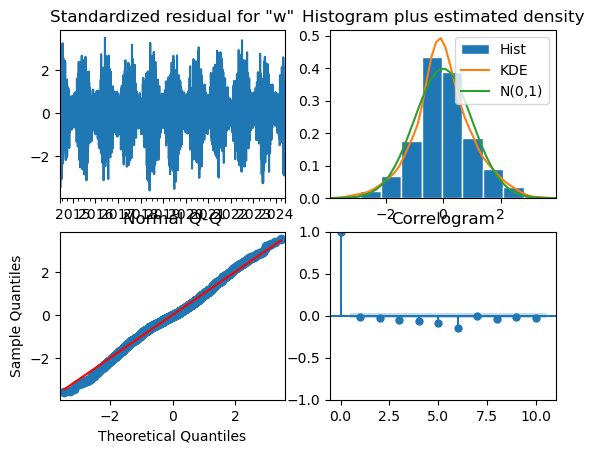

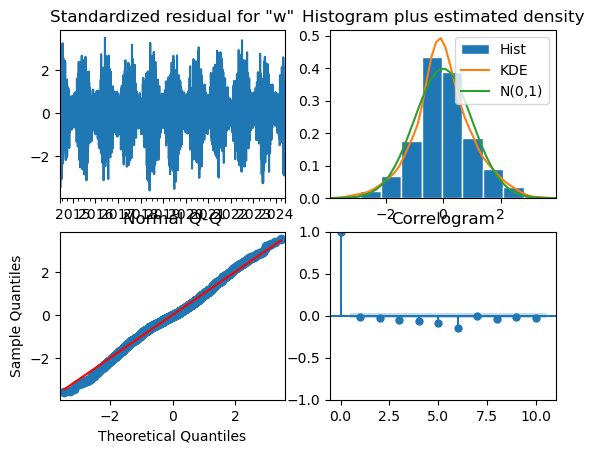

In [17]:
model_fit.plot_diagnostics()

In [18]:
model_fit.forecast(steps=10)

2024-06-02   -173902.212222
2024-06-03   -169342.253113
2024-06-04   -178823.338146
2024-06-05   -174246.147145
2024-06-06   -180591.157504
2024-06-07   -177250.000610
2024-06-08   -176537.696435
2024-06-09   -175959.872705
2024-06-10   -177028.975764
2024-06-11   -176740.549857
Freq: D, Name: predicted_mean, dtype: float64

In [19]:
todays_forecast.columns

Index(['temperature_2m_max', 'sunrise', 'weather_score', 'daylight_duration',
       'precipitation_sum', 'wind_gusts_10m_max', 'description',
       'average_t_score', 'weight', 'event', 'weather_code',
       'shortwave_radiation_sum', 'sunshine_duration', 'rain_sum',
       'weather_score_weighted', 'precipitation_hours', 'snowfall_sum',
       'sunset', 'season', 'wind_direction_10m_dominant', 'wind_speed_10m_max',
       'temperature_2m_min', 'apparent_temperature_max',
       'apparent_temperature_min', 'forecasted_event'],
      dtype='object')

## Predicting today's event

In [20]:
todays_forecast

,temperature_2m_max,sunrise,weather_score,daylight_duration,precipitation_sum,wind_gusts_10m_max,description,average_t_score,weight,event,...,precipitation_hours,snowfall_sum,sunset,season,wind_direction_10m_dominant,wind_speed_10m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,forecasted_event
date,,,,,,,,,,,,,,,,,,,,,
2024-06-02 07:00:00,76.541901,0,1,59585.378906,0.003937,28.6336,Light Showers,0.300818,-85790.265625,Rain,...,1.0,0.0,0,summer,303.869476,13.287101,55.9319,74.898544,53.38242,Rain


In [21]:

# historical_weather, historical_summary = musical_weather.get_stored_weather()
# todays_forecast = musical_weather.get_forecast()

# model_base, model_fit = musical_weather.create_weather_model(historical_weather)

# Fit the model to your data
# model_base.fit(todays_forecast['weather_score_weighted'])
# Fit the model
model_fit = model_base.fit()

# Get the fitted parameters
params = model_fit.params

# Use the model to make a prediction for the specified column in today's forecast
forecast = model_fit.predict(start=todays_forecast.index[0], end=todays_forecast.index[-1])

In [22]:
# # Initialize a dictionary to hold the models
# models = {}

# # Fit auto_arima function to each column in your historical data
# for col in historical_weather_arm.columns:
#     models[col] = auto_arima(historical_weather_arm[col], start_p = 1, start_q = 1,
#                              max_p = 3, max_q = 3, m = 12,
#                              start_P = 0, seasonal = True,
#                              d = None, D = 1, trace = True,
#                              error_action ='ignore',   # we don't want to know if an order does not work
#                              suppress_warnings = True,  # we don't want convergence warnings
#                              stepwise = True)           # set to stepwise

# # Now 'models' is a dictionary where the keys are column names and the values are fitted models

In [23]:
# model_base = ARIMA(historical_weather, order=stepwise_fit.order)

## Playlist and weather matching

In [24]:
# import musical_weather
# import pandas as pd

# historical_weather, historical_summary = musical_weather.get_stored_weather()
# todays_forecast = musical_weather.get_forecast(historical_weather)

In [25]:
# weather_music = musical_weather.get_music_selection(todays_forecast)
# weather_music

In [26]:
todays_t_score = todays_forecast['average_t_score'][0]
weather_std, weather_music, selected_songs = musical_weather.get_music_selection(todays_forecast, historical_weather, todays_t_score)

In [27]:
todays_t_score

0.3008181894257723

In [28]:
weather_std

0.36017821418554

In [29]:
weather_music

,loudness,speechiness,instrumentalness,liveness,time_signature,song,track_id,artist,event,type,...,valence,tempo,duration_ms,time_signature_power_transform,popularity_quantile_transform,is_precipitation,event_le,score,t_score,average_t_score
0,-9.514,0.0452,0.272000,0.6380,3,Lord Huron,3hRV0jL3vUpRrcy398teAU,The Night We Met,Rain,Weather,...,0.0998,174.097,208212,-2.101430,0.987487,1,3,-1907.053980,NaN,-0.076572
1,-7.028,0.0277,0.000023,0.1330,4,Creedence Clearwater Revival,2LawezPeJhN4AWuSB0GtAU,Have You Ever Seen The Rain,Rain,Weather,...,0.7740,116.109,160133,0.196259,0.975475,1,3,-3013.900961,NaN,-0.008014
2,-13.858,0.0426,0.000001,0.1140,3,keshi,72sfmdpuO5r8cBDgs7MqZZ,UNDERSTAND,Rain,Weather,...,0.1630,82.085,150520,-2.101430,0.774775,1,3,-2368.808960,NaN,-0.641420
3,-6.032,0.0281,0.005370,0.1080,4,Hozier,37zuIvk4KBkAxxLJsxJaHq,Would That I,Rain,Weather,...,0.5020,130.694,268293,0.196259,0.726226,1,3,-3220.633336,NaN,-0.199225
4,-23.625,0.0598,0.765000,0.1080,3,Elliott Smith,52Bg6oaos7twR7IUtEpqcE,Between The Bars,Rain,Weather,...,0.3420,135.298,141280,-2.101430,0.552052,1,3,-1623.513514,NaN,-0.452496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4724,-11.570,0.0281,0.000229,0.1670,3,Lamp,3tu3nbfeAwQ8xgi2YrnQBA,Old Notebook,Drizzle,Weather,...,0.3450,150.333,279186,-2.101430,0.190691,1,1,-2803.517200,NaN,-0.082184
4725,-12.149,0.0322,0.000722,0.1260,4,Lamp,05TWN8gERjdwtKYBsEmxwW,Amidst the Morning Fog,Drizzle,Weather,...,0.1390,130.314,283900,0.196259,0.190691,1,1,-2808.384035,NaN,-0.253031
4726,-12.120,0.0325,0.144000,0.1190,4,Lamp,1nPXBgflWZSAomAon6i7qw,Alone in My Room,Drizzle,Weather,...,0.0866,120.308,281482,0.196259,0.266266,1,1,-2749.378159,NaN,-0.055982
4727,-15.870,0.0311,0.414000,0.1300,4,Lamp,6gjLFDKn5F1yFY3p1mOE00,Night Drizzle,Drizzle,Weather,...,0.0729,131.115,176411,0.196259,0.195195,1,1,-1680.667719,NaN,-0.239097


In [30]:
selected_songs

,loudness,speechiness,instrumentalness,liveness,time_signature,song,track_id,artist,event,type,...,valence,tempo,duration_ms,time_signature_power_transform,popularity_quantile_transform,is_precipitation,event_le,score,t_score,average_t_score
16,-12.111,0.0388,0.168000,0.0924,4,José González,0ZNYGrmcehorhh9JOeg5Iv,Stay Alive,Rain,Weather,...,0.3140,129.984,266907,0.196259,0.552052,1,3,-2857.223493,NaN,-0.182912
21,-12.431,0.0264,0.000231,0.1240,4,Neil Young,5l9c6bJmzvftumhz4TMPgk,Harvest Moon,Rain,Weather,...,0.4080,112.938,303213,0.196259,0.680180,1,3,-3563.973947,NaN,-0.180569
23,-11.879,0.0369,0.000044,0.0872,4,Birdy,5sF7hdYvhrcgNq8NZjfK8L,Not About Angels,Rain,Weather,...,0.2190,116.860,189475,0.196259,0.611612,1,3,-2108.104563,NaN,-0.317397
24,-9.558,0.0430,0.452000,0.1070,4,Alex G,36TbBJ7mLPOZMAYs0p4mxb,Mary,Rain,Weather,...,0.4020,105.955,197733,0.196259,0.702202,1,3,-2866.867914,NaN,-0.105371
27,-16.670,0.0498,0.004690,0.0248,4,Ed Sheeran,0Tel1fmuCxEFV6wBLXsEdk,Kiss Me,Rain,Weather,...,0.1820,74.993,280853,0.196259,0.572573,1,3,-4302.136205,NaN,-0.129534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4724,-11.570,0.0281,0.000229,0.1670,3,Lamp,3tu3nbfeAwQ8xgi2YrnQBA,Old Notebook,Drizzle,Weather,...,0.3450,150.333,279186,-2.101430,0.190691,1,1,-2803.517200,NaN,-0.082184
4725,-12.149,0.0322,0.000722,0.1260,4,Lamp,05TWN8gERjdwtKYBsEmxwW,Amidst the Morning Fog,Drizzle,Weather,...,0.1390,130.314,283900,0.196259,0.190691,1,1,-2808.384035,NaN,-0.253031
4726,-12.120,0.0325,0.144000,0.1190,4,Lamp,1nPXBgflWZSAomAon6i7qw,Alone in My Room,Drizzle,Weather,...,0.0866,120.308,281482,0.196259,0.266266,1,1,-2749.378159,NaN,-0.055982
4727,-15.870,0.0311,0.414000,0.1300,4,Lamp,6gjLFDKn5F1yFY3p1mOE00,Night Drizzle,Drizzle,Weather,...,0.0729,131.115,176411,0.196259,0.195195,1,1,-1680.667719,NaN,-0.239097
